In [1]:
import urllib3
urllib3.disable_warnings()

from IPython.core.display import HTML
css = HTML("""
<style>
.jp-Cell.jp-MarkdownCell {
    max-width: 900px;
    margin-left: 100px;
    box-shadow: rgba(99, 99, 99, 0.2) 0px 2px 8px 0px;
    padding-bottom: 20px;
}
.jp-MarkdownOutput > :not(h1, h2, h3, table) {
  margin-left: 50px;
  margin-right: 50px;
}
</style>""")
display(css)

# Partie 1

Un logiciel informatique dépend en général d'un certain nombre de librairies "open-source".

On cherche à connaître l'ensemble des librairies dont un projet dépend, sachant que chaque librairie dépend à son tour d'un certain nombre d'autres librairies.

<div style="float: middle">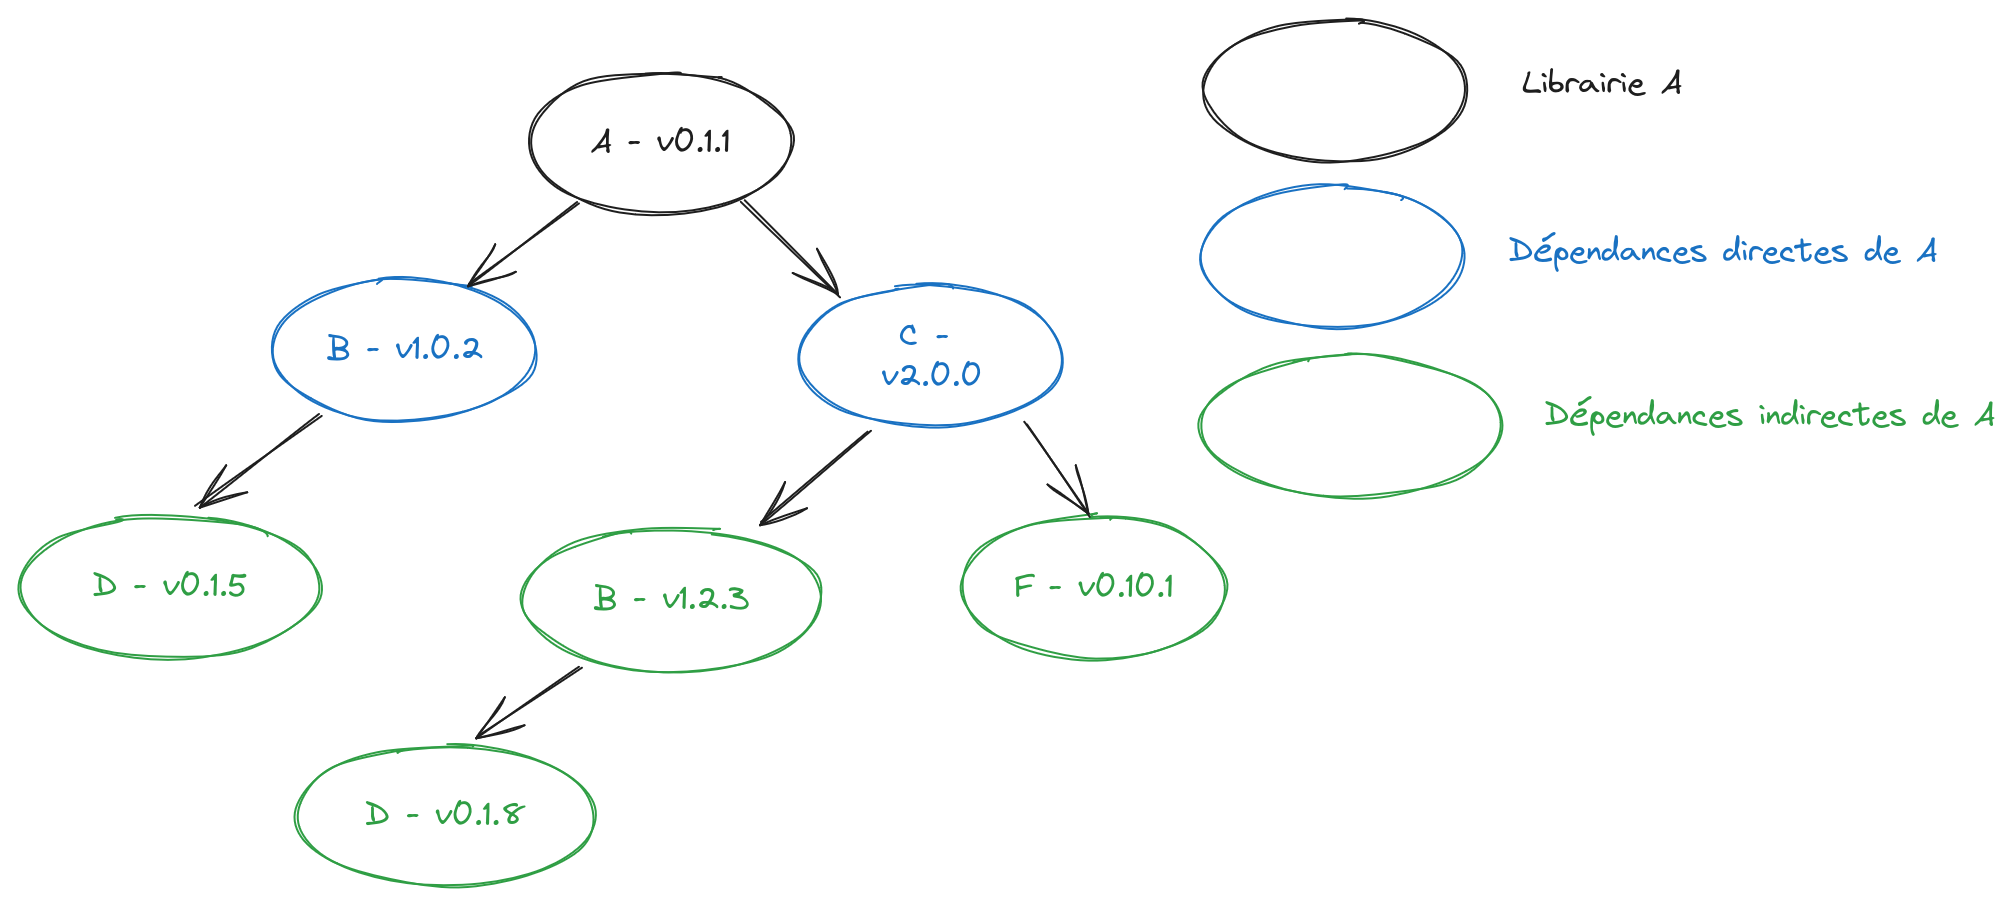</div>

Afin de simuler l'existence d'un dépot de librairies, on pourra supposer avoir une fonction `fetch_dependencies` qui permet d'obtenir les dépendances directes de chaque librairie.

```python
fetch_dependencies(name: str, version: str) -> list[tuple[str, str]]:
```

Exemple:

```python
>>> fetch_dependencies(name="A", version="v0.1.1")
[ 
 ("B", "v1.0.2"),
 ("C", "v2.0.0"),
]
```

<div style="border: 1px solid black; padding: 5px"> 
    <h2>Exercice 1</h2>
Écrire une fonction qui, étant donné une librairie, retourne l'ensemble des ses dépendances (directes et indirectes).
</div>



# Partie 2

Dans certains langages (tels qu'en python), on ne peut installer qu'un unique version de chaque librairie. On souhaite donc développer un algorithme qui permette de ne garder qu'une seule version de chaque libraire voulue.


<div style="float: middle">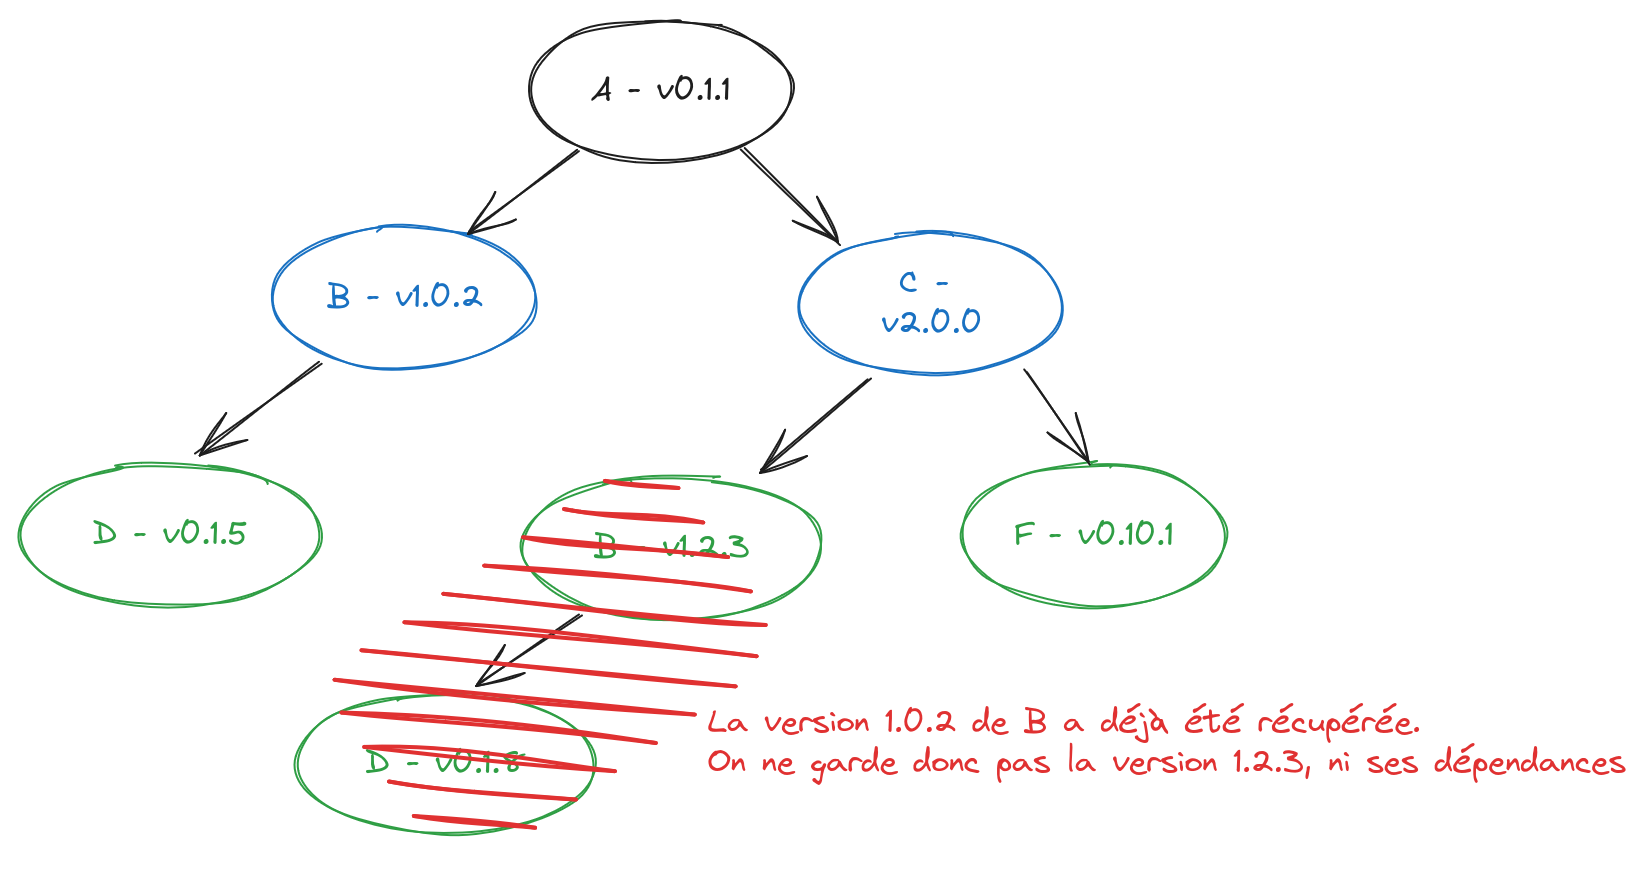</div>


<div style="border: 1px solid black; padding: 5px"> 
    <h2>Exercice 2</h2>
Écrire une fonction qui, étant donné  une librairie, retourne l'ensemble des ses dépendances (directes et indirectes), en ne gardant qu'une version par librairie.


**Note:** il existe plusieurs solutions possibles. Sur l'exemple précédent, on aurait pu garder la version `1.2.3` de `B` (ainsi que ses dépendances) au lieu de la `1.0.2`

</div>


# Annexe

Afin de faire cet exercice, on pourra s'aider d'une API listant les dépendances de chaque package.

Pour un package et une version données, on pourra accéder à la liste des dépendances à l'url `https://sapristi.github.io/data/deps/<Package>/<Version>.json`. Par exemple, https://sapristi.github.io/data/deps/A/v0.0.2.json pour la version `v0.0.2` du package `A`.

Afin de récupérer ces données en python, on pourra utiliser la librairie `requests`:


In [6]:
import requests

requests.get("https://sapristi.github.io/data/deps/A/v0.0.2.json").json()

{'name': 'A',
 'version': 'v0.0.2',
 'dependencies': [{'name': 'J', 'version': 'v0.2.0'}]}

On pourra prendre les libraires suivantes comme valeurs de départs des exercices qui suivent:
- librarie `C`, version `v0.4.1`
- librairie `A`, version `v0.0.2`
- librairie `R`, version `v0.0.2`